In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from nuflux import detgeo, data
from memory_profiler import profile
import gc
import objgraph

In [2]:
cc = detgeo.get_quantities("mutristan_small", N_evals = 1e6)

In [21]:
Lc_factor = 0
geom = "approximate_muon_detector_2"
particle = 'both'
sim,sim2 = detgeo.SimulateDetector(cc, Lc_factor, geom, particle).run()

sim time: 31.2
Filename: /n/home06/lbojorquezlopez/BIN_MC/nuflux/detgeo.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   273   6228.3 MiB   6228.3 MiB           1       @profile
   274                                             def run(self):
   275   6228.3 MiB      0.0 MiB           1           if (self.particle == "nue") | (self.particle == "numu"):
   276   6228.3 MiB      0.0 MiB           1               self.time[0] = time.time()
   277   6694.6 MiB    466.3 MiB           1               self.find_info()
   278   7246.3 MiB    551.7 MiB           1               self.get_probs()
   279   4359.3 MiB  -2887.0 MiB           1               self.get_event_positions()
   280                                                     
   281   4359.3 MiB      0.0 MiB           1               print(f'sim time: {(self.time[6] - self.time[0]):.3g}')
   282                                                     
   283                                                     
   28

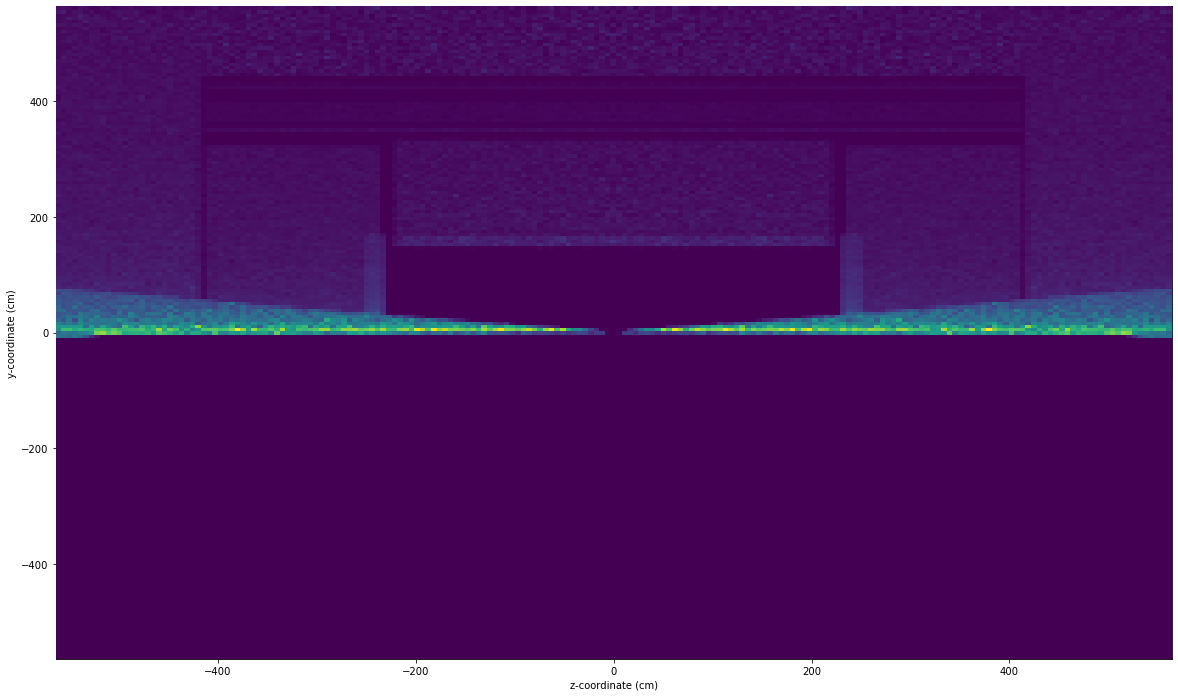

In [22]:
arr = sim.events_position
arr2 = sim2.events_position
plt.figure(figsize=(20,12))
bs = np.linspace(-564, 564, 200)
bs2 = np.linspace(-645, 645, 200)
plt.hist2d(np.concatenate((arr[:, :,2].flatten(), arr2[:, :,2].flatten(), -1*arr[:, :,2].flatten(), -1 * arr2[:, :,2].flatten())), np.concatenate((arr[:,:,1].flatten(), arr2[:, :,1].flatten(), arr[:,:,1].flatten(), arr2[:, :,1].flatten())), alpha = 1, zorder = 10, bins = (bs), weights = np.concatenate((sim.part_face_counts.flatten()/2,sim2.part_face_counts.flatten()/2, sim.part_face_counts.flatten()/2, sim2.part_face_counts.flatten()/2)))

detgeo.plot_sim(geom)

In [12]:
detgeo.che()

mem
Filename: /n/home06/lbojorquezlopez/BIN_MC/nuflux/detgeo.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   492   1009.9 MiB   1009.9 MiB           1   @profile
   493                                         def che():
   494   1009.9 MiB      0.0 MiB           1       print('mem')


